In [267]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data_path='C:/Users/User/Documents/house_train.csv'
house_train=pd.read_csv(data_path)
print(house_train['SalePrice'])
train_y=np.log1p(house_train['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [268]:
# log 處理後
train_y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [269]:
# 拿掉 id
train_x=house_train.drop(['Id','SalePrice'] ,axis=1)
train_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [270]:
# 只取 int64,float64 數值型資料欄位，存於feature box中
feature_box=[]
for dtype,feature in zip(train_x.dtypes, train_x.columns):
    if dtype=='int64' or dtype=='float64':
        feature_box.append(feature)
print(f'{len(feature_box)} Numeric feature: {feature_box}\n')

36 Numeric feature: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [271]:
train_x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [272]:
# 刪去文字型欄位，留下數值型
train_x=train_x[feature_box]
# 將缺失值填補成-1
train_x=train_x.fillna(-1)
MM_coder=MinMaxScaler()
train_num=train_y.shape[0]
train_x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [273]:
# 顯示 1stFlrSF 欄位
train_x['1stFlrSF']

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

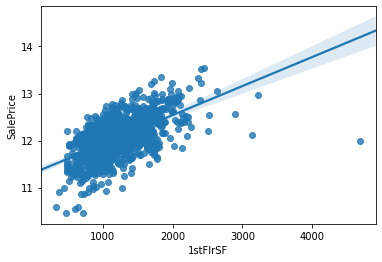

0.846643681071632

In [274]:
import seaborn as sns
# 關聯圖繪製
sns.regplot(x=train_x['1stFlrSF'][:train_num],y=train_y)
plt.show()

# 線性回歸並觀察分數
train_X=MM_coder.fit_transform(train_x)
estimator=LinearRegression()
origin_score=cross_val_score(estimator,train_X,train_y,cv=5).mean()
origin_score

In [275]:
# 檢查分位數，這裡取3%,97%
print(np.percentile(train_x['1stFlrSF'],2))
print(np.percentile(train_x['1stFlrSF'],98))

583.7
2072.2799999999997


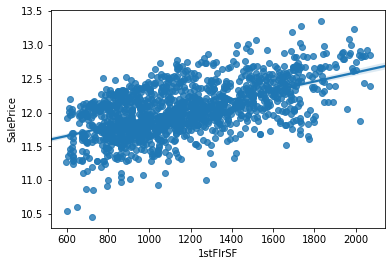

In [281]:
# 將 1stFlrSF 限制在合適的範圍內，調整離群值
train_x2=train_x['1stFlrSF'].clip(583.7,2072.3)
# train_x2=train_x['1stFlrSF'].clip(625,1981)
sns.regplot(x=train_x2,y=train_y)
plt.show()

In [282]:
# 做線性回歸並觀察分數
train_X2=MM_coder.fit_transform(train_x2)
estimator=LinearRegression()
a1=cross_val_score(estimator,train_X2,train_y,cv=5).mean()

print("original score:",origin_score)
print("After score:", a1)

ValueError: Expected 2D array, got 1D array instead:
array=[ 856. 1262.  920. ... 1188. 1078. 1256.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

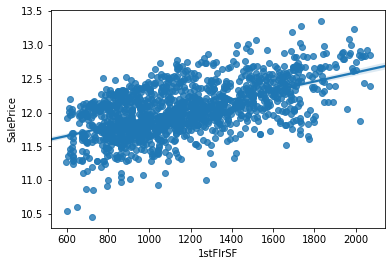

original score: 0.846643681071632
After score_1: 0.8748851707950202
After score2: 0.8862940154750903


In [280]:
# # 將 1stFlrSF 限制在合適的範圍內，捨棄離群值
keep_range=(train_x['1stFlrSF']>584)&(train_x['1stFlrSF']<2072)
train_x=train_x[keep_range]
train_y=train_y[keep_range]
sns.regplot(x=train_x['1stFlrSF'],y=train_y)
plt.show()

# 做線性回歸觀察分數
train_X=MM_coder.fit_transform(train_x)
estimator=LinearRegression()
a2=cross_val_score(estimator,train_X,train_y,cv=5).mean()

print("original score:",origin_score)
print("After score_1:", a1)
print("After score2:", a2)